<a href="https://colab.research.google.com/github/alinaalborova/nlp_course/blob/master/Lab2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Майнор "Интеллектуальный анализ данных"
# Курс "Современные методы машинного обучения"
# Лабораторная работа №2. Распознование одежды.

В данной лабораторной работе вам предлагается обучить модель на основе нейронной сети для распознавания типов одежды и сравнить ее с "классическими" моделями.

## Данные

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import label_binarize

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

In [83]:
print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape, 'type', type(X_train))
print('X_test shape:', X_test.shape, 'y_test shape', y_test.shape, 'type', type(X_test))

X_train shape: (60000, 784) y_train shape: (60000,) type <class 'numpy.ndarray'>
X_test shape: (10000, 784) y_test shape (10000,) type <class 'numpy.ndarray'>


Каждая строка в `X_train`, `X_test` - векторизованное монохромное изображение размерности  28×28  
Каждая строка в `y_train`, `y_test` - метка класса для соответсвующей строчки из `X_train`, `X_test`


In [0]:
labels_map  = pd.read_csv('data/labels_map.csv', index_col='Label')

Для каждого объекта из обучающей и тестовой выборки назначен один из следующих классов:

In [96]:
labels_map

,Description
Label,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


In [0]:
pic_id = 40
some_pic = X_train[pic_id]
pic_label = y_train[pic_id]

In [87]:
print('Letter class:', pic_label, '-', labels_map.loc[pic_label, 'Description'])

Letter class: 6 - Shirt


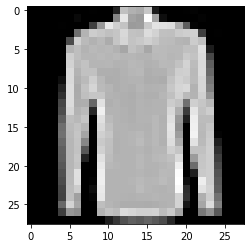

In [88]:
plt.imshow(some_pic.reshape((28, 28)), cmap='gray')
plt.show()

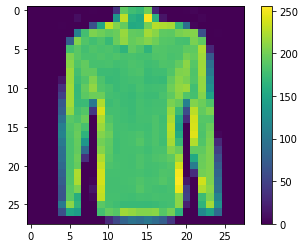

In [70]:
plt.figure()
plt.imshow(some_pic.reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
X_train = X_train / 255.0

X_test = X_test / 255.0

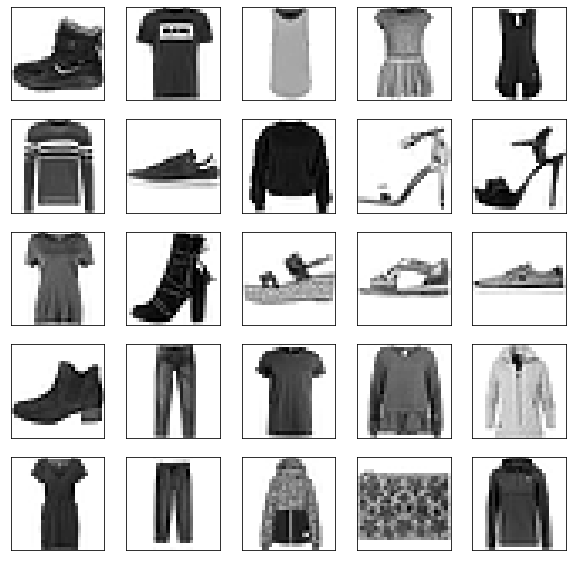

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels_map[y_train[i]])
plt.show()

In [0]:
y_train_e = label_binarize(y_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
y_test_e = label_binarize(y_test, range(10))

In [198]:
y_test_e

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, classification_report, multilabel_confusion_matrix

## Задания

Обучение неоходимо проводить на данных из `X_train`, качество модели проверять на данных из файла `X_test`.
Для моделирования желательно использовать библиотеки `keras` и `tensorflow`.  

Оценивать качество моделей нужно следующим образом:  
1. Построить кривую ROC  
2. Посчитать ROC AUC  
3. Построить кривую Precision - Recall  
4. Вывести `classification_report` из `sklearn.metrics`  
5. Посчитать confussion matrix  

#### Auxiliary Evaluation Functions

In [0]:
def roc_auc_plt(y_test, preds):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(10):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), preds.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  plt.figure()
  lw = 2
  plt.plot(fpr[2], tpr[2], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [0]:
def precision_recall_plot(y_test, preds):
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          preds[:, i])
      average_precision[i] = average_precision_score(y_test[:, i], preds[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
      preds.ravel())
  average_precision["micro"] = average_precision_score(y_test, preds,
                                                      average="micro")
  print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))
  plt.figure()
  plt.step(recall['micro'], precision['micro'], where='post')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(
      'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
      .format(average_precision["micro"]))

### Задание 1

Обучите классический алгоритм машинного обучения для этих данных (например, SVM, Random Forest или Gradient Boosting Trees), используя интенсивности пикселей в качестве входного вектора для классификации. Оцените ошибку.  
**(max 3 балла)**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train_e)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_preds = rf.predict(X_test)

In [0]:
roc_auc_plt(y_test_e, rf_preds)

In [0]:
precision_recall_plot(y_test_e, rf_preds)

In [0]:
 print(classification_report(y_test_e, rf_preds, labels=range(10)))

In [0]:
multilabel_confusion_matrix(y_test_e, rf_preds)

### Задание 2

1. Построить и обучить модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.
2. Попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. 
3. Оценить качество моделей с различными параметрами, выбрать наилучшую из рассмотренных моделей.

В начале можетбыть полезно ознакомиться с [руководством по созданию последовательных моделей в Keras](https://keras.io/getting-started/sequential-model-guide).  
А так же с [функциональным API keras](https://keras.io/getting-started/functional-api-guide). 
Создание последовательных моделей немного проще, в то время как функциональное API предоставляет больше гибкости. Для целей лабораторной работы подойдет любое.  
**(max 4 балла)**

In [117]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


#### 2 Dense Layers

In [0]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10)

In [0]:
predictions = model.predict(X_test)
predicted_classes = np.array([np.argmax(i) for i in predictions])
predicted_classes_e = label_binarize(predicted_classes, range(10))

In [0]:
roc_auc_plt(y_test_e, predicted_classes_e)

In [0]:
precision_recall_plot(y_test_e, predicted_classes_e)

In [0]:
 print(classification_report(y_test_e, predicted_classes_e, labels=range(10)))

In [0]:
multilabel_confusion_matrix(y_test_e, predicted_classes_e)

#### 3 Dense Layers

In [0]:
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.fit(X_train, y_train, epochs=10)

In [0]:
predictions_2 = model2.predict(X_test)
predicted_classes_2 = np.array([np.argmax(i) for i in predictions_2])
predicted_classes_e_2 = label_binarize(predicted_classes_2, range(10))

In [0]:
roc_auc_plt(y_test_e, predicted_classes_e_2)

In [0]:
precision_recall_plot(y_test_e, predicted_classes_e_2)

In [0]:
 print(classification_report(y_test_e, predicted_classes_e_2, labels=range(10)))

In [0]:
multilabel_confusion_matrix(y_test_e, predicted_classes_e_2)

#### 3 Danse Layers - Variation

In [0]:
model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [268]:
model3.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4846 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3632 - acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3280 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3032 - acc: 0.8876
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2883 - acc: 0.8928
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2709 - acc: 0.8989
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2598 - acc: 0.9021
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2494 - acc: 0.9060
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2399 - acc: 0.9103
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
predictions_3 = model3.predict(X_test)
predicted_classes_3 = np.array([np.argmax(i) for i in predictions_3])
predicted_classes_e_3 = label_binarize(predicted_classes_3, range(10))

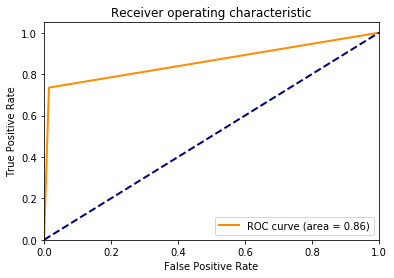

In [272]:
roc_auc_plt(y_test_e, predicted_classes_e_3)

Average precision score, micro-averaged over all classes: 0.79


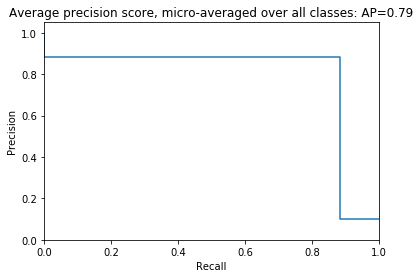

In [275]:
precision_recall_plot(y_test_e, predicted_classes_e_3)

In [276]:
 print(classification_report(y_test_e, predicted_classes_e_2, labels=range(10)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.99      0.95      0.97      1000
           2       0.81      0.79      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.77      0.85      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.69      0.70      1000
           7       0.91      0.98      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.93      0.95      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000
 samples avg       0.88      0.88      0.88     10000



In [277]:
multilabel_confusion_matrix(y_test_e, predicted_classes_e_2)

array([[[8850,  150],
        [ 166,  834]],

       [[8992,    8],
        [  46,  954]],

       [[8809,  191],
        [ 211,  789]],

       [[8906,   94],
        [ 119,  881]],

       [[8743,  257],
        [ 146,  854]],

       [[8984,   16],
        [  38,  962]],

       [[8726,  274],
        [ 307,  693]],

       [[8907,   93],
        [  22,  978]],

       [[8956,   44],
        [  26,  974]],

       [[8975,   25],
        [  71,  929]]])

### Задание 3

1. Найти 5 пар классов, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
2. Насколько равномерно обучилась ваша модель, а именно все ли классы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также классы с самым лучшим и с самым худшим процентом детекции (точностью детекции).  
**(max 2 балла)**

### Задание 4

Попробовать другие возможные архитектуры: большее/меньшее количество слоёв, свёрточные слои, использование весов из предобученных моделей и т.д. На сколько получится улучшить результат?  
**(max 3 балла)**